# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [3]:
cities

['longyearbyen',
 'plettenberg bay',
 'petropavlovsk-kamchatsky',
 'college',
 'adamstown',
 'puerto san carlos',
 'hawaiian paradise park',
 'porto novo',
 'codrington',
 'grytviken',
 'waitangi',
 "'ohonua",
 'badger',
 "bu'aale",
 'carauari',
 'kodiak',
 'port-aux-francais',
 'parsons',
 'isafjordur',
 'sao felix do xingu',
 'weno',
 'arendal',
 'bilibino',
 "st. john's",
 'horta',
 'berdigestyakh',
 'chunskiy',
 'new castle',
 'toga village',
 'hermanus',
 'severo-yeniseyskiy',
 'tidjikja',
 'bredasdorp',
 'peace river',
 'marsh harbour',
 'kashgar',
 'san antonio oeste',
 'jiuquan',
 'wailua homesteads',
 'aasiaat',
 'khandyga',
 'fort mcmurray',
 'taiohae',
 'olonkinbyen',
 'bethel',
 'jamestown',
 'edinburgh of the seven seas',
 'es castell',
 'al jawf',
 'saipan',
 'port mathurin',
 'fuvahmulah',
 'stanley',
 'quang ngai',
 'flying fish cove',
 'puerto ayora',
 'hithadhoo',
 'neiafu',
 'change',
 'margaret river',
 'mata-utu',
 'haiku-pauwela',
 'mingshui',
 'lebu',
 'tazovsky'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Testing
city = "alofi"
url = "http://api.openweathermap.org/data/2.5/weather?"
cityurl = f"{url}appid={weather_api_key}&q={city}&units=metric"

citydata = []
city_weather = requests.get(cityurl).json()

city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

# Append the City information into citydata list
citydata.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": (city_max_temp),
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    
df = pd.DataFrame(citydata)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,24.94,100,85,1.03,NU,1707326621


In [5]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | plettenberg bay
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | bu'aale
Processing Record 15 of Set 1 | carauari
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | parsons
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | sao felix do xingu
Proc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-7.09,73,75,5.66,SJ,1707326627
1,plettenberg bay,-34.0527,23.3716,20.87,73,11,3.74,ZA,1707326628
2,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,76,75,3.00,RU,1707326629
3,college,64.8569,-147.8028,-14.50,79,75,0.00,US,1707326629
4,adamstown,-25.0660,-130.1015,24.74,87,100,5.06,PN,1707326630


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-7.09,73,75,5.66,SJ,1707326627
1,plettenberg bay,-34.0527,23.3716,20.87,73,11,3.74,ZA,1707326628
2,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,76,75,3.00,RU,1707326629
3,college,64.8569,-147.8028,-14.50,79,75,0.00,US,1707326629
4,adamstown,-25.0660,-130.1015,24.74,87,100,5.06,PN,1707326630


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

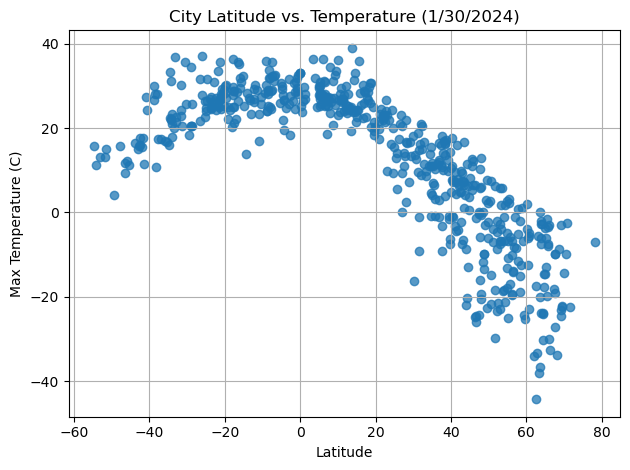

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

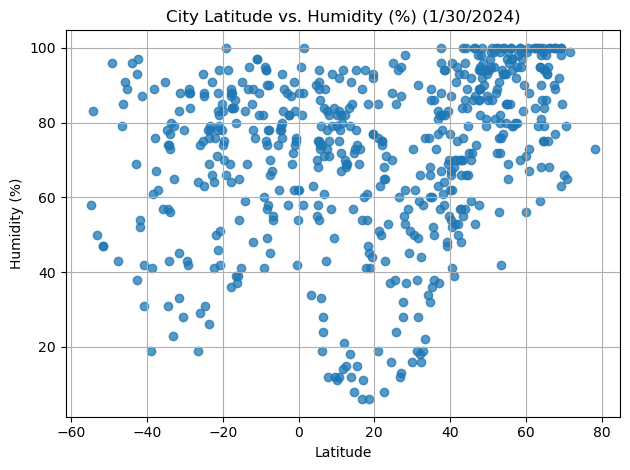

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

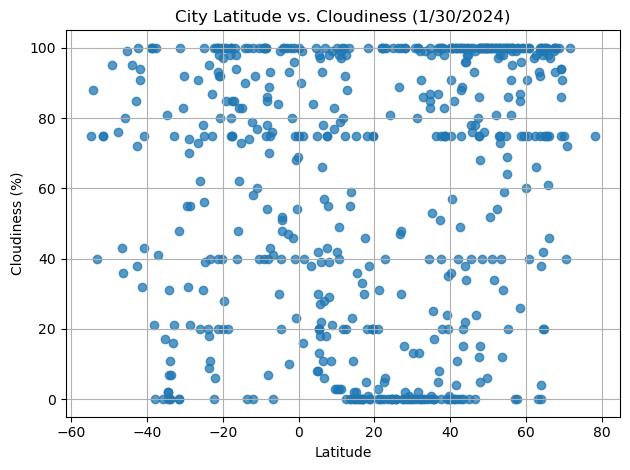

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

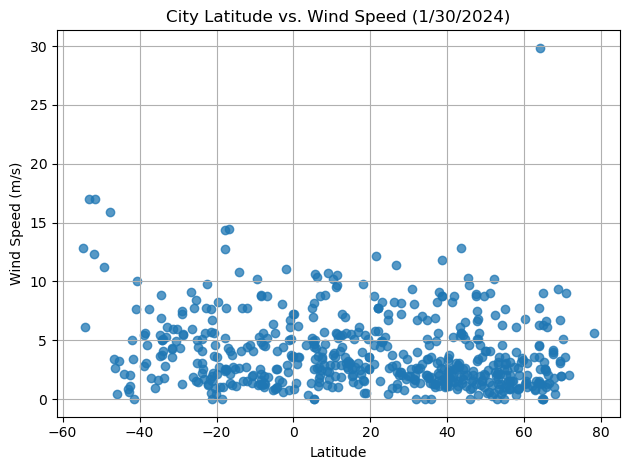

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (1/30/2024)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plots(x_values, y_values, y_label, annotate_loc):
    
    # Linear Regression Data
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    
    # Plot Scatterplot w/ Linear Regression Data
    # xlabel always Lat, ylabel changes...
    plt.scatter(x_values, y_values, alpha = 0.75)
    plt.grid(False) 
    plt.tight_layout()
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_loc, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-7.09,73,75,5.66,SJ,1707326627
2,petropavlovsk-kamchatsky,53.0452,158.6483,-7.53,76,75,3.00,RU,1707326629
3,college,64.8569,-147.8028,-14.50,79,75,0.00,US,1707326629
5,hawaiian paradise park,19.5933,-154.9731,18.35,93,75,3.60,US,1707326632
6,porto novo,6.4965,2.6036,30.90,28,11,3.66,BJ,1707326632


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,plettenberg bay,-34.0527,23.3716,20.87,73,11,3.74,ZA,1707326628
4,adamstown,-25.0660,-130.1015,24.74,87,100,5.06,PN,1707326630
7,codrington,-38.2667,141.9667,10.84,89,21,3.07,AU,1707326633
8,grytviken,-54.2811,-36.5092,11.32,83,88,6.11,GS,1707326634
9,waitangi,-43.9535,-176.5597,16.57,96,95,2.15,NZ,1707326635


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.873425376419159


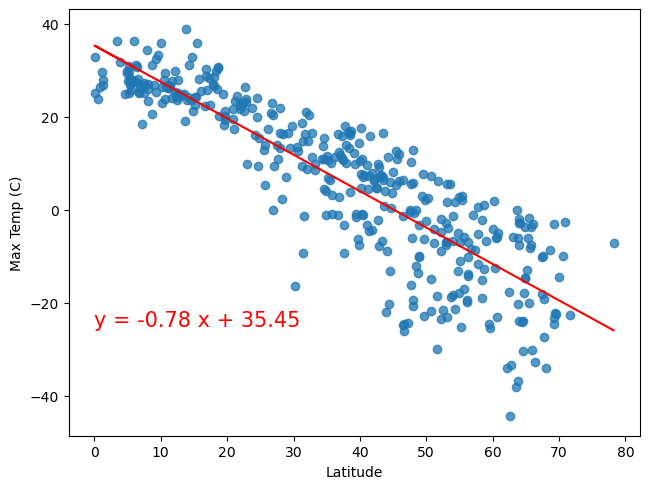

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp (C)", (0,-25))

The r-value is: 0.6139698700635384


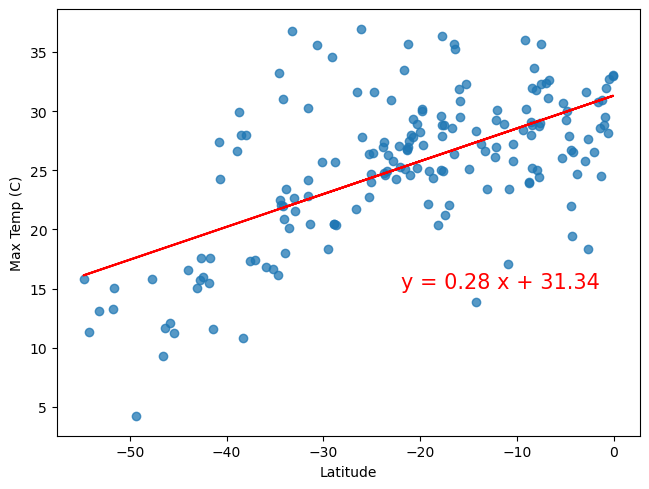

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plots(x_values, y_values, "Max Temp (C)", (-22,15))

**Discussion about the linear relationship:** Northern Hemisphere the regression displays a negative relationship between temperature and latitude,as the latitude increases the distance from the equator increases. As you move away from the Ecuator max tem decreases. In the southern hemisphere, as the latitude increases the distance from the equator decreases.As you move closer to the equator, the max temperature increases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4223655097406741


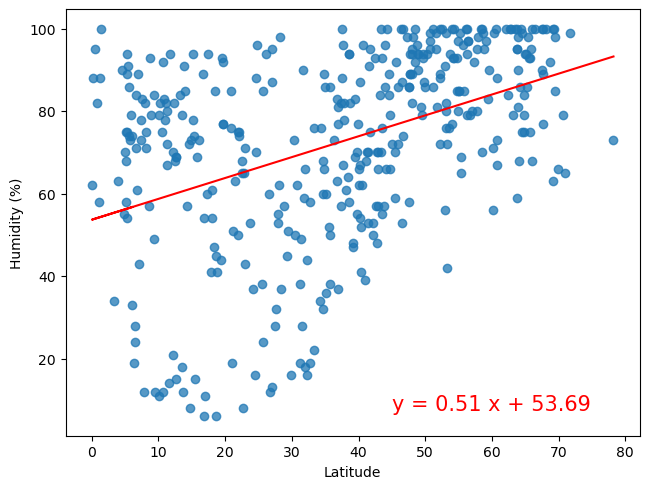

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity (%)", (45,7.5))

The r-value is: 0.1748202268877859


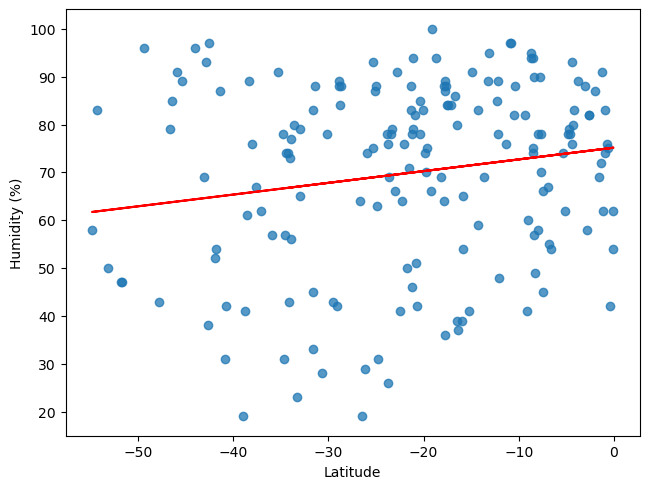

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plots(x_values, y_values, "Humidity (%)", (-55,10))

**Discussion about the linear relationship:** In Northern Hemisphere relationship is slightly positive, bu doesn't appear to be a strong coorelation between humidity and latitude. Southern value much lower, so much less coorelation

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34528760785314616


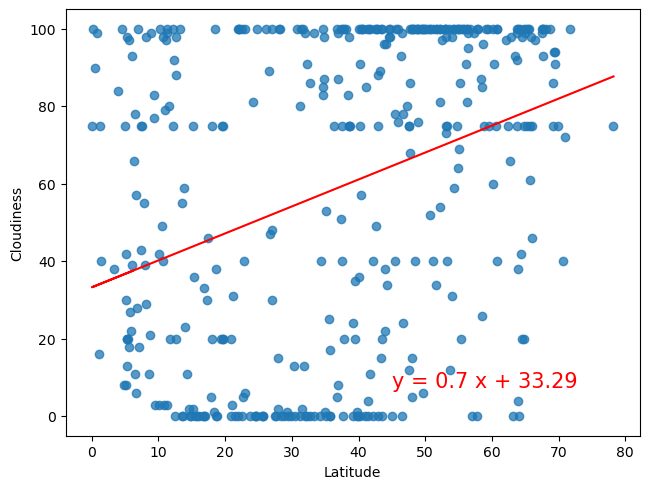

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (45,7.5))

The r-value is: 0.1272411646091922


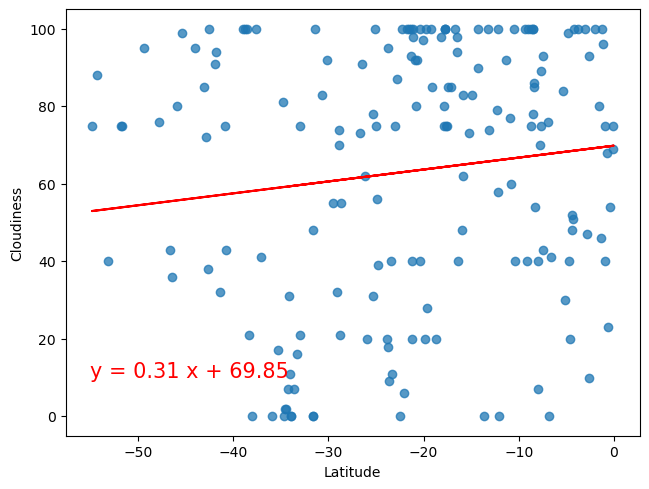

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plots(x_values, y_values, "Cloudiness", (-55,10))

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12977852760607816


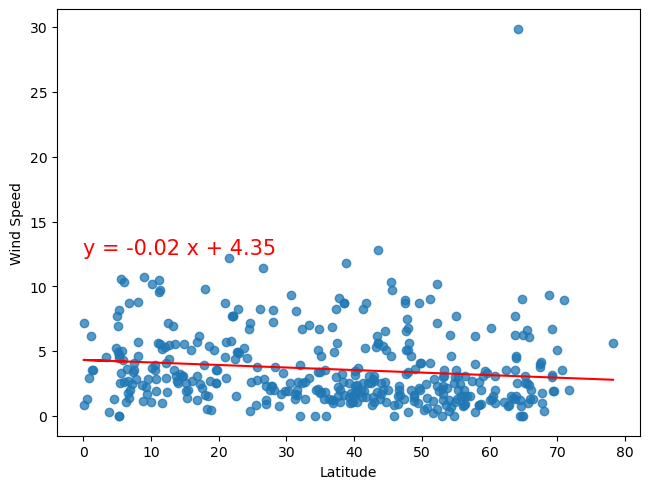

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (0,12.5))

The r-value is: -0.23534557889803526


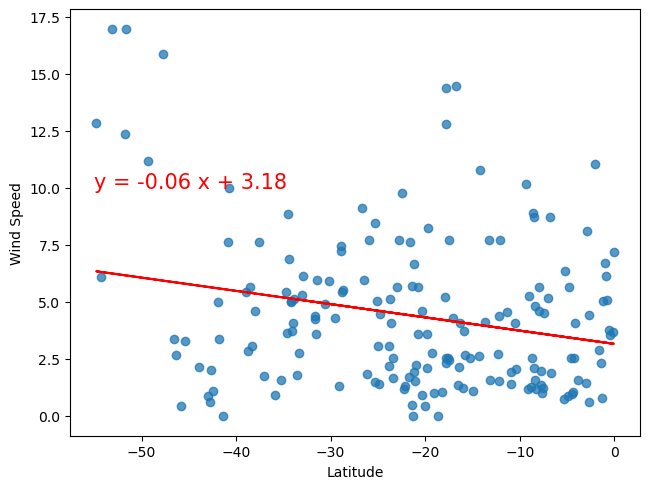

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plots(x_values, y_values, "Wind Speed", (-55,10))

**Discussion about the linear relationship:** There does not appear to be a coorelation between latitude and windspeed